In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 22)
pd.set_option('display.max_rows', 300)

In [2]:
data = pd.read_csv("../data_sets/Employee_Compensation_SF.csv")

In [3]:
data.head()

,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
0,Fiscal,2016,1,Public Protection,DAT,District Attorney,311.0,Municipal Attorneys' Association,8100,Legal & Court,8177,Attorney (Civil/Criminal),49919,114473.16,0.0,1500.00,115973.16,21025.98,13068.80,9368.71,43463.49,159436.65
1,Calendar,2013,5,Culture & Recreation,ART,Arts Commission,790.0,"SEIU - Miscellaneous, Local 1021",1800,"Budget, Admn & Stats Analysis",1844,Senior Management Assistant,1225,84077.11,0.0,0.00,84077.11,16587.30,12457.73,6931.91,35976.94,120054.05
2,Calendar,2015,4,Community Health,DPH,Public Health,535.0,"SEIU - Human Services, Local 1021",2900,Human Services,2903,Eligibility Worker,34873,9980.17,0.0,798.43,10778.60,0.00,2254.93,835.11,3090.04,13868.64
3,Fiscal,2015,4,Community Health,DPH,Public Health,250.0,"SEIU - Health Workers, Local 1021",2200,Medical & Dental,2202,Dental Aide,51145,2873.41,0.0,0.00,2873.41,0.00,622.63,222.46,845.09,3718.50
4,Fiscal,2014,5,Culture & Recreation,REC,Recreation and Park Commission,790.0,"SEIU - Miscellaneous, Local 1021",3200,Recreation,3279,Recreation Leader,48705,6701.85,0.0,176.70,6878.55,0.00,2711.66,538.43,3250.09,10128.64


In [4]:
le = LabelEncoder()
data['Organization Group']= le.fit_transform(data['Organization Group'])

In [5]:
data.drop(data.columns[[0, 4, 5, 7, 8, 9, 10, 11]], axis = 1, inplace = True)

In [6]:
data.head(100)

,Year,Organization Group Code,Organization Group,Union Code,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
0,2016,1,5,311.0,49919,114473.16,0.00,1500.00,115973.16,21025.98,13068.80,9368.71,43463.49,159436.65
1,2013,5,1,790.0,1225,84077.11,0.00,0.00,84077.11,16587.30,12457.73,6931.91,35976.94,120054.05
2,2015,4,0,535.0,34873,9980.17,0.00,798.43,10778.60,0.00,2254.93,835.11,3090.04,13868.64
3,2015,4,0,250.0,51145,2873.41,0.00,0.00,2873.41,0.00,622.63,222.46,845.09,3718.50
4,2014,5,1,790.0,48705,6701.85,0.00,176.70,6878.55,0.00,2711.66,538.43,3250.09,10128.64
5,2013,2,6,21.0,19801,45321.18,0.00,0.00,45321.18,9386.03,11780.60,3486.34,24652.97,69974.15
6,2015,5,1,790.0,14135,28305.50,0.00,1193.14,29498.64,6616.52,5793.48,2430.74,14840.74,44339.38
7,2014,6,2,21.0,37352,39938.09,0.00,800.00,40738.09,8685.34,7269.02,3277.52,19231.88,59969.97
8,2015,1,5,911.0,13380,23112.00,2312.73,20944.16,46368.89,4183.12,1911.46,68.84,6163.42,52532.31
9,2014,1,5,498.0,46569,89101.22,6856.77,5563.78,101521.77,17596.33,12512.55,1627.91,31736.79,133258.56


In [7]:
new_data = data.dropna()

In [8]:
num = new_data._get_numeric_data()
num[num < 0] = 0
new_data.head()

,Year,Organization Group Code,Organization Group,Union Code,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
0,2016,1,5,311.0,49919,114473.16,0.0,1500.00,115973.16,21025.98,13068.80,9368.71,43463.49,159436.65
1,2013,5,1,790.0,1225,84077.11,0.0,0.00,84077.11,16587.30,12457.73,6931.91,35976.94,120054.05
2,2015,4,0,535.0,34873,9980.17,0.0,798.43,10778.60,0.00,2254.93,835.11,3090.04,13868.64
3,2015,4,0,250.0,51145,2873.41,0.0,0.00,2873.41,0.00,622.63,222.46,845.09,3718.50
4,2014,5,1,790.0,48705,6701.85,0.0,176.70,6878.55,0.00,2711.66,538.43,3250.09,10128.64


In [9]:
X1 = new_data.iloc[:,0:2]
X2 = new_data.iloc[:,3:14]
X = pd.concat([X1, X2],axis=1)
y = new_data.iloc[:,2]

In [10]:
X.head()

,Year,Organization Group Code,Union Code,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
0,2016,1,311.0,49919,114473.16,0.0,1500.00,115973.16,21025.98,13068.80,9368.71,43463.49,159436.65
1,2013,5,790.0,1225,84077.11,0.0,0.00,84077.11,16587.30,12457.73,6931.91,35976.94,120054.05
2,2015,4,535.0,34873,9980.17,0.0,798.43,10778.60,0.00,2254.93,835.11,3090.04,13868.64
3,2015,4,250.0,51145,2873.41,0.0,0.00,2873.41,0.00,622.63,222.46,845.09,3718.50
4,2014,5,790.0,48705,6701.85,0.0,176.70,6878.55,0.00,2711.66,538.43,3250.09,10128.64


In [11]:
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, y)
print(model.feature_importances_)

[0.00229304 0.72446303 0.10568048 0.00242758 0.01504952 0.0121851
 0.00968132 0.03018789 0.01891462 0.02328681 0.02495595 0.01357003
 0.01730463]


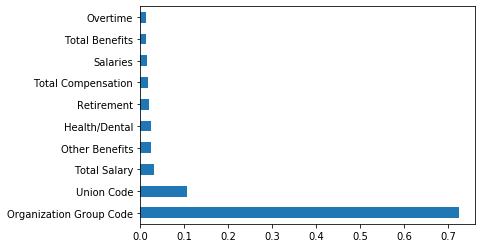

In [12]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()